<a href="https://colab.research.google.com/github/jsalbr/m3nlp/blob/main/Question_Answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question Answering

Dieses Notebook sollte mit GPU ausgeführt werden.  
Dafür bitte zunächst im Menü "Laufzeit"->"Laufzeittyp ändern"->"Hardwarebeschleuniger: GPU" einstellen.


Credits: Das Notebook verwendet Ideen von
  * Natural Language Processing with Transformers von Lewis Tunstall, Leandro von Werra, Thomas Wolf, O'Reilly 2021, https://www.oreilly.com/library/view/natural-language-processing/9781098103231/
  * Heise Academy NLP-Kurs von Christian Winkler, https://github.com/heiseacademy/nlp-course/tree/main/09_Transfer_Learning
  * Haystack Tutorial von deepset.io, https://github.com/deepset-ai/haystack#mortar_board-tutorials

### System vorbereiten

In [1]:
# suppress warnings
import warnings;
warnings.filterwarnings('ignore');


In [1]:
!pip install -q transformers==4.12.3
!pip install datasets
!pip install -q farm-haystack

     |████████████████████████████████| 3.1 MB 5.5 MB/s 
     |████████████████████████████████| 3.3 MB 35.4 MB/s 
     |████████████████████████████████| 596 kB 42.3 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 895 kB 37.0 MB/s 
     |████████████████████████████████| 200 kB 5.4 MB/s 
     |████████████████████████████████| 402 kB 38.2 MB/s 
     |████████████████████████████████| 204 kB 41.4 MB/s 
     |████████████████████████████████| 3.0 MB 33.3 MB/s 
     |████████████████████████████████| 51.5 MB 25 kB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 8.4 MB 33.5 MB/s 
     |████████████████████████████████| 100 kB 8.5 MB/s 
     |████████████████████████████████| 5.6 MB 40.2 MB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |██████████████████████

In [5]:
!wget https://raw.githubusercontent.com/jsalbr/m3nlp/main/question_answering.patch
!patch /usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py -i question_answering.patch

--2021-11-07 13:41:39--  https://raw.githubusercontent.com/jsalbr/m3nlp/main/question_answering.patch
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198 [text/plain]
Saving to: ‘question_answering.patch’

question_answering. 100%[===================>]     198  --.-KB/s    in 0s      

2021-11-07 13:41:39 (9.17 MB/s) - ‘question_answering.patch’ saved [198/198]

patching file /usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py


## Modell laden

Eine Übersicht über die QA-Modelle auf dem HuggingFace Hub gibt's hier:  
https://huggingface.co/models?pipeline_tag=question-answering&sort=downloads


https://huggingface.co/Sahajtomar/GBERTQnA
https://huggingface.co/Sahajtomar/German-question-answer-Electra


In [52]:
from transformers import pipeline

model = "Sahajtomar/German-question-answer-Electra"
qa = pipeline("question-answering", model=model, tokenizer=model, device=0)

11/07/2021 17:05:53 - DEBUG - filelock -   Attempting to acquire lock 140074151212496 on /root/.cache/huggingface/transformers/359c5665dbb8cf2551665f80f466eeda9633a5e047a2071c576c48c3d342aba2.344acb8d14990a533c123860dd06b1d0b868ed56abe2592f5988569beefde836.lock
11/07/2021 17:05:53 - DEBUG - filelock -   Lock 140074151212496 acquired on /root/.cache/huggingface/transformers/359c5665dbb8cf2551665f80f466eeda9633a5e047a2071c576c48c3d342aba2.344acb8d14990a533c123860dd06b1d0b868ed56abe2592f5988569beefde836.lock


Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

11/07/2021 17:05:53 - DEBUG - filelock -   Attempting to release lock 140074151212496 on /root/.cache/huggingface/transformers/359c5665dbb8cf2551665f80f466eeda9633a5e047a2071c576c48c3d342aba2.344acb8d14990a533c123860dd06b1d0b868ed56abe2592f5988569beefde836.lock
11/07/2021 17:05:53 - DEBUG - filelock -   Lock 140074151212496 released on /root/.cache/huggingface/transformers/359c5665dbb8cf2551665f80f466eeda9633a5e047a2071c576c48c3d342aba2.344acb8d14990a533c123860dd06b1d0b868ed56abe2592f5988569beefde836.lock
11/07/2021 17:05:53 - DEBUG - filelock -   Attempting to acquire lock 140074151212496 on /root/.cache/huggingface/transformers/220400d01ad7f721a71b70de999c42a5d0e83d51ee7616b6b37241462629af91.e034d46aac8e1c7918ee222812aaf859960064ae38b68da61ec4a3a2d6d060bd.lock
11/07/2021 17:05:53 - DEBUG - filelock -   Lock 140074151212496 acquired on /root/.cache/huggingface/transformers/220400d01ad7f721a71b70de999c42a5d0e83d51ee7616b6b37241462629af91.e034d46aac8e1c7918ee222812aaf859960064ae38b68da6

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

11/07/2021 17:06:56 - DEBUG - filelock -   Attempting to release lock 140074151212496 on /root/.cache/huggingface/transformers/220400d01ad7f721a71b70de999c42a5d0e83d51ee7616b6b37241462629af91.e034d46aac8e1c7918ee222812aaf859960064ae38b68da61ec4a3a2d6d060bd.lock
11/07/2021 17:06:56 - DEBUG - filelock -   Lock 140074151212496 released on /root/.cache/huggingface/transformers/220400d01ad7f721a71b70de999c42a5d0e83d51ee7616b6b37241462629af91.e034d46aac8e1c7918ee222812aaf859960064ae38b68da61ec4a3a2d6d060bd.lock
11/07/2021 17:07:01 - DEBUG - filelock -   Attempting to acquire lock 140074214986192 on /root/.cache/huggingface/transformers/da8046fc069326930914229074db1aebbc8cca57be2caa523e83b62fa500dc68.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2fe78c7322a9ac8d64.lock
11/07/2021 17:07:01 - DEBUG - filelock -   Lock 140074214986192 acquired on /root/.cache/huggingface/transformers/da8046fc069326930914229074db1aebbc8cca57be2caa523e83b62fa500dc68.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2f

Downloading:   0%|          | 0.00/240k [00:00<?, ?B/s]

11/07/2021 17:07:01 - DEBUG - filelock -   Attempting to release lock 140074214986192 on /root/.cache/huggingface/transformers/da8046fc069326930914229074db1aebbc8cca57be2caa523e83b62fa500dc68.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2fe78c7322a9ac8d64.lock
11/07/2021 17:07:01 - DEBUG - filelock -   Lock 140074214986192 released on /root/.cache/huggingface/transformers/da8046fc069326930914229074db1aebbc8cca57be2caa523e83b62fa500dc68.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2fe78c7322a9ac8d64.lock
11/07/2021 17:07:02 - DEBUG - filelock -   Attempting to acquire lock 140074147345360 on /root/.cache/huggingface/transformers/15887374dca5a89c9347dd00dc888cb306da950972ae1bee00ba3a78dfc89731.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d.lock
11/07/2021 17:07:02 - DEBUG - filelock -   Lock 140074147345360 acquired on /root/.cache/huggingface/transformers/15887374dca5a89c9347dd00dc888cb306da950972ae1bee00ba3a78dfc89731.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

11/07/2021 17:07:02 - DEBUG - filelock -   Attempting to release lock 140074147345360 on /root/.cache/huggingface/transformers/15887374dca5a89c9347dd00dc888cb306da950972ae1bee00ba3a78dfc89731.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d.lock
11/07/2021 17:07:02 - DEBUG - filelock -   Lock 140074147345360 released on /root/.cache/huggingface/transformers/15887374dca5a89c9347dd00dc888cb306da950972ae1bee00ba3a78dfc89731.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d.lock
11/07/2021 17:07:02 - DEBUG - filelock -   Attempting to acquire lock 140074149782800 on /root/.cache/huggingface/transformers/5d931bcf9a3e980e7ce6955afd57e0bf196b2dece65b1cb6318a4dea96bf167d.39191c6b878e708c701c94df554638c0769e546946fb63ddc9917c7e27837d53.lock
11/07/2021 17:07:02 - DEBUG - filelock -   Lock 140074149782800 acquired on /root/.cache/huggingface/transformers/5d931bcf9a3e980e7ce6955afd57e0bf196b2dece65b1cb6318a4dea96bf167d.39191c6b878e708c701c94df554638c0769e546946fb63dd

Downloading:   0%|          | 0.00/355 [00:00<?, ?B/s]

11/07/2021 17:07:02 - DEBUG - filelock -   Attempting to release lock 140074149782800 on /root/.cache/huggingface/transformers/5d931bcf9a3e980e7ce6955afd57e0bf196b2dece65b1cb6318a4dea96bf167d.39191c6b878e708c701c94df554638c0769e546946fb63ddc9917c7e27837d53.lock
11/07/2021 17:07:02 - DEBUG - filelock -   Lock 140074149782800 released on /root/.cache/huggingface/transformers/5d931bcf9a3e980e7ce6955afd57e0bf196b2dece65b1cb6318a4dea96bf167d.39191c6b878e708c701c94df554638c0769e546946fb63ddc9917c7e27837d53.lock


## Fragen zu Artikel beantworten

Beispielartikel: 
https://www.heise.de/news/Giga-Factory-Berlin-fast-fertig-Erstes-Tesla-Model-Y-noch-dieses-Jahr-6213528.html

In [119]:
context = """Giga Factory Berlin fast fertig – Erstes Tesla Model Y noch dieses Jahr

Elon Musk hat in knapp zwei Jahren eine riesige Fabrik vor die Tore Berlins gesetzt. 
Samstag ließ er erstmals Bürger ein. Nicht alle Nachbarn sind begeistert.

Der US-Elektroautobauer Tesla will spätestens im Dezember in Deutschland die Produktion 
für Europa starten. Dies kündigte Firmengründer Elon Musk am Wochenende bei einem Bürgerfest 
in seinem ersten europäischen Werk bei Berlin an. Kritik von Anwohnern und Umweltschützern 
an der in nur zwei Jahren konzipierten und errichteten Industrieanlage widersprach er. 
Ziel sei "eine wunderschöne Fabrik in Harmonie mit ihrer Umgebung".

Künftig sollen etwa 12.000 Mitarbeiter in Grünheide bis zu 500.000 Elektroautos im Jahr bauen. 
Dabei will Tesla möglichst viele Teile vor Ort produzieren, um von Zulieferern unabhängig zu sein. 
Tesla betont vor allem die Bedeutung der eigenen Druckgussanlage und der hochmodernen Lackiererei. 
Zudem entsteht neben dem Autowerk eine eigene Batteriefabrik.
"""

Jetzt können wir Fragen stellen:

In [140]:
question="Wer ist Elon Musk?"
answer = qa(question, context)
answer['answer']

'Firmengründer'

In [141]:
question="Wer ist der Firmengründer?"
answer = qa(question, context)
answer['answer']

'Elon Musk'

In [143]:
question="Wer ist gründete Tesla?"
answer = qa(question=question, context=context)
answer['answer']

'Elon Musk'

In [144]:
question="Was ist Tesla?"
answer = qa(question=question, context=context)
answer['answer']

'US-Elektroautobauer'

In [145]:
question="Wer ist Tesla?"
answer = qa(question=question, context=context)
answer['answer']

'Elon Musk'

In [146]:
question="Wer ist VW?"
answer = qa(question=question, context=context)
answer['answer']

'Tesla'

In [154]:
question="Wer ist Greta Thunberg?"
answer = qa(question=question, context=context)
answer['answer']

'Elon Musk'

In [153]:
question="Wer ist Greta Thunberg?"
answer = qa(question=question, context=context, handle_impossible_answer=True)
answer['answer']

''

In [158]:
question="Was will Elon Musk?"
answer = qa(question=question, context=context, handle_impossible_answer=True)
answer

{'answer': 'die Produktion \nfür Europa starten',
 'end': 341,
 'score': 0.07014939934015274,
 'start': 307}

In [159]:
# question="Wieviele?" #"Was ist wichtig?"
question="Was will Elon Musk?"
answer = qa(question=question, context=context, handle_impossible_answer=True, top_k=5)
display_qa(answer, question, context)

In [160]:
question="Was ist wichtig?"
answer = qa(question=question, context=context, handle_impossible_answer=True, top_k=5)
display_qa(answer, question, context)

In [164]:
from IPython.display import display, HTML

def display_qa(answers, question='', context='', padding=50):
  if type(answers) != list:
    answers = [answers]
  html = "<table>"
  if len(question) > 0: 
      html += f"<tr><td>Question:</td><td><span style='font-weight:bold'>{question}</span></td></tr>"
      html += f"<tr><td>&nbsp;<td><td> </td></tr>"
  for a in answers:
    if len(a['answer']) > 0:
      html += f"<tr><td>Answer:</td><td><span style='font-weight:bold'>{a['answer']}</span></td></tr>"
    else:
      html += f"<tr><td>Answer:</td><td>answer impossible</td></tr>"
    html += f"<tr><td>Score:</td><td>{a['score']}</td></tr>"
    html += f"<tr><td>Span:</td><td>{a['start']}:{a['end']}</td></tr>"
    if len(a['answer']) > 0 and len(context) > 0:
      left = max(0, a['start']-padding)
      right = min(a['end']+padding, len(context))
      html += "<tr><td>Snippet:</td><td>"
      html += f"{context[left:a['start']]}<span style='color:blue;font-weight:bold'>"
      html += context[a['start']:a['end']]
      html += f"</span>{context[a['end']:right]}</td>"
    html += f"<tr><td>&nbsp;<td><td> </td></tr>"
  html += '</table><br/>'
  display(HTML(html))

display_qa(answer, question, context)

## Fragen zu Wikipedia beantworten

Steige nun in den nächsten Level ein und nutze einen komplizierteren Text, nämlich einen Wikipedia Artikel über [Die Simpsons](https://de.wikipedia.org/wiki/Die_Simpsons).

In [70]:
!pip install readability-lxml

In [166]:
from readability import Document
import requests
from bs4 import BeautifulSoup
doc = Document(requests.get("https://de.wikipedia.org/wiki/Game_of_Thrones", stream=True).text)
soup = BeautifulSoup(doc.summary())            
context = soup.text
len(context)

99932

Das sind ca. 80kB!

In [169]:
question="Wer sind die Geschwister von Arya?"
answer = qa(question=question, context=context)
display_qa(answer, question, context)

In [177]:
question="Wen heiratet Tyrion?"
answer = qa(question=question, context=context)
display_qa(answer, question, context)

In [176]:
question="Wer ist Tyrion Lennister?"
answer = qa(question=question, context=context) #, top_k=5)
display_qa(answer, question, context)

In [173]:
question="Wann stirbt Eddard Stark?"
answer = qa(question=question, context=context, top_k=5, handle_impossible_answers=True)
display_qa(answer, question, context)

In [117]:
question="Wo stirbt Eddard Stark?"
answer = qa(question=question, context=context, top_k=5, handle_impossible_answers=True)
display_qa(answer, question, context)

## Retriever-Reader mit Haystack



In [2]:
!pip install datasets

     |████████████████████████████████| 290 kB 5.5 MB/s 
  Using cached huggingface_hub-0.1.1-py3-none-any.whl (59 kB)
     |████████████████████████████████| 132 kB 49.6 MB/s 
     |████████████████████████████████| 243 kB 39.7 MB/s 
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.8
    Uninstalling huggingface-hub-0.0.8:
      Successfully uninstalled huggingface-hub-0.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.6.1 requires huggingface-hub==0.0.8, but you have huggingface-hub 0.1.1 which is incompatible.


https://huggingface.co/datasets/subjqa

In [2]:
import pandas as pd
pd.options.display.max_colwidth = 200 # default 50; -1 = all
pd.options.display.float_format = '{:.2f}'.format

In [12]:
from datasets import load_dataset

# other options include: books, grocery, movies, restaurants, tripadvisor
subjqa = load_dataset("subjqa", "electronics")
subjqa.set_format("pandas")

# flatten the nested dataset columns for easy access
df = [ds[:] for split, ds in subjqa.flatten().items() if split == 'train'][0]

# select some columns
#df = df[["title", "question", "answers.text", "answers.answer_start", "context"]]
df = df.drop_duplicates(subset="context").rename(columns={"answers.text": "answer", "answers.answer_start": "start"})

print(list(df.columns))
print(f"\n{len(df)} rows")

11/07/2021 16:49:26 - WARNING - datasets.builder -   Reusing dataset subjqa (/root/.cache/huggingface/datasets/subjqa/electronics/1.1.0/e5588f9298ff2d70686a00cc377e4bdccf4e32287459e3c6baf2dc5ab57fe7fd)


  0%|          | 0/3 [00:00<?, ?it/s]

['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answer', 'start', 'answers.answer_subj_level', 'answers.ans_subj_score', 'answers.is_ans_subjective']

1265 rows


In [13]:
df.sample(3)

,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answer,start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
418,electronics,better,price,more,price,95d3e35080f3c6c20f1c11c4f3c629c3,5,0.00,False,a4adcf4ff0eaacd5a3af73bd6251472c,04fc710df6e577a31ca19cbaa90ac4f1,B002WE6D44,"I'm glad I went for this 32 gb, class 10 card when I bought my new camera. It works great, it's fast, it has a lot of room on it... I feel like it's going to be quite a while before I even need to...",What is the price?,[The price on this card is definitely better than I could find for other brands of the same size],[334],[1],[0.33333334],[False]
1059,electronics,excellent,image quality,good,result,971b78a0775380b4bb0eca91c221d542,1,0.30,False,260d33a7e2073c34289dcb1a534e2c8d,1b51b97f23a454578c869c4d9531dce1,B00889ST2G,"The Sony RX100 is a great camera overall, but has some weaknesses in the performance area that take some of the shine away from the overall shooting experience.Image quality at lower ISOs is excel...",What was the best result?,[Image quality at lower ISOs is excellent],[160],[1],[1.0],[True]
1005,electronics,large,keyboard,good,touch,7cfa40788187db54e80b0a0e535c54fc,2,0.70,True,02db471cf67c5a593f2412b0a2a556de,ca1bc25bd744d38216c2ad9880d792db,B007PRHNHO,"I bought this used but it appears &#34;like new.&#34; Having had a very bad experience with a less expensive transparent keyboard that magnetically fit over the iPad keyboard, this is a delight. ...",How light touch of polish should be given for the screen?,[],[],[],[],[]


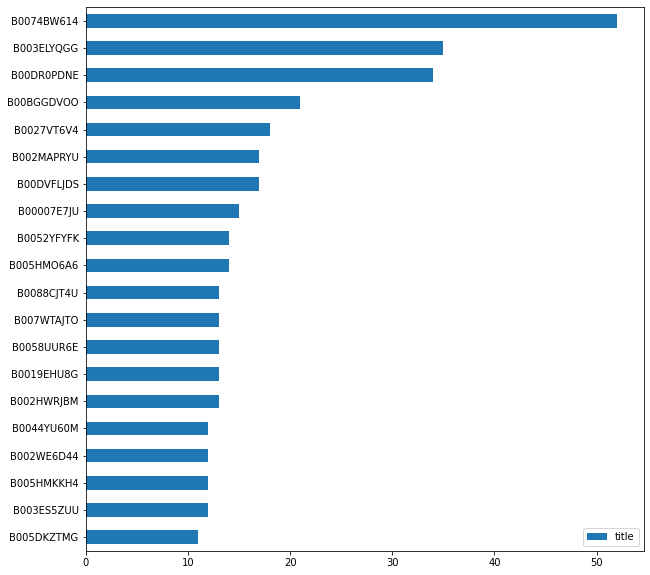

In [14]:
df['title'].value_counts().head(20).to_frame().plot(kind="barh", figsize=(10,10)).invert_yaxis()

https://www.amazon.com/dp/B003ELYQGG

https://amazon-asin.com/asincheck/?product_id=B003ELYQGG

<img src="https://m.media-amazon.com/images/I/31oE5NluLhL.jpg" width="100"/>

Panasonic ErgoFit In-Ear Earbud Headphones RP-HJE120-D (Orange) Dynamic Crystal Clear Sound, Ergonomic Comfort-Fit

In [16]:
item_id = "B003ELYQGG"

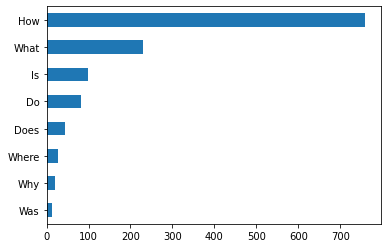

In [47]:
counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]

for q in question_types:
    counts[q] = df["question"].str.startswith(q).value_counts()[True]

pd.Series(counts).sort_values().plot(kind="barh");

In [ ]:
from haystack.nodes import FARMReader, TransformersReader

## Befüllen des Document Stores für den Retriever

Haystack unterstützt folgende Document Stores:
  * Elasticsearch (Sparse BM25/TF-IDF + Dense Vectors, https://elastic.co)
  * FAISS (von Facebook AI für Dense Vectors, https://faiss.ai/)
  * SQL (SQLite, PostgreSQL, MySQL)
  * InMemoryDocumentStore

In [1]:
# In-Memory Document Store
from haystack.document_store import InMemoryDocumentStore
document_store = InMemoryDocumentStore()

/usr/local/lib/python3.7/dist-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


In [64]:
!pip install "grpcio==1.41.0"

     |████████████████████████████████| 3.9 MB 5.4 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.37.1
    Uninstalling grpcio-1.37.1:
      Successfully uninstalled grpcio-1.37.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymilvus 1.1.2 requires grpcio<1.38.0,>=1.22.0, but you have grpcio 1.41.0 which is incompatible.


In [20]:
docs = []
for _, row in df.query(f"title == '{item_id}'").iterrows():
    doc = {"text": row["context"],
           "meta": {"item_id": row["title"], 
                    "qid": row["id"],
                    "aspect": row["query_asp"]}}
    docs.append(doc)
print(len(docs))
docs

35


[{'meta': {'aspect': 'quality',
   'item_id': 'B003ELYQGG',
   'qid': '6b2766870a84ac516022094e71c6fc53'},
  'text': "I needed new headphones so I got these and the JBuds J3 Micro Atomic In-Ear Earbuds (purchased them for $19.99 now they are $9.99) and planned to test between them and return one. My quick response is that I'll keep the Panasonic. Bass, treble, and mids seem pretty decent. Fit in the ear well and for the $6 I spent, great price. The JBuds have slightly better sound but aren't as good for working out but not good enough to pay an extra $14. So if you want to use your earbuds while running/working out, get the Panasonic. If you're using them to just relax/walk around, the JBuds are slightly better and work it at $9.99."},
 {'meta': {'aspect': 'rating',
   'item_id': 'B003ELYQGG',
   'qid': '9dde62500b59148cbcd2f1b2fa28199d'},
  'text': "I bought these to replace my i-Luv earbud headphones that only lasted a couple of months. Compared the iLuv product, this product fails t

In [18]:
document_store.write_documents(docs, index="document")

In [19]:
from haystack.retriever.sparse import TfidfRetriever
retriever = TfidfRetriever(document_store=document_store)

11/07/2021 16:50:50 - INFO - haystack.retriever.sparse -   Found 1265 candidate paragraphs from 1265 docs in DB


In [43]:
from textwrap import wrap, fill

In [59]:
question = "How is the bass?"

retrieved_docs = retriever.retrieve(query=question, top_k=3)

for doc in retrieved_docs:
    print(fill(doc.text), end="\n\n")

I bought these thinking, what the heck? 20 bucks? And i was blown away
with the sound quality, these headphones have incredible sound quality
for an incredible price. They do not have a lot off bass, so all of
you people looking for tons of bass, you won't get a ton of it here,
but the bass present is rich and sounds great.

I don't consider myself an audiofile, but I can still tell the
difference between good and bad headphones.  I don't like when
speakers/headphones have strong bass, but make everything sound muddy.
These headphones aren't very heavy on the bass, but the bass that it
does put out is very clear and solid.  I had a pair of Koss UR-20s
that sounded terribly muddy after listening to the HD-202s.

These headphones are my first pair of Bluetooth ear buds. The ear
pieces themselves are huge! You really need to adjust it correctly in
order to keep it in. Then again, my ears are pretty tiny. I don't know
about the other reviews that say the bass is rubbish, when it's
amazing.

In [45]:
## Reader

In [54]:
!pip show haystack

In [81]:
from haystack.reader.farm import FARMReader

max_seq_length = 384
doc_stride = 128

reader = FARMReader(model_name_or_path=model, progress_bar=False,
                    # max_seq_len=max_seq_length, doc_stride=doc_stride,
                    return_no_answer=False, use_gpu=True)

11/07/2021 17:20:59 - INFO - farm.utils -   Using device: CUDA 
11/07/2021 17:20:59 - INFO - farm.utils -   Number of GPUs: 1
11/07/2021 17:20:59 - INFO - farm.utils -   Distributed Training: False
11/07/2021 17:20:59 - INFO - farm.utils -   Automatic Mixed Precision: None
Some weights of the model checkpoint at Sahajtomar/German-question-answer-Electra were not used when initializing ElectraModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
11/07/2021 17:21:17 - WARNING - farm.utils -   ML Logging is turned off. No parameters, metrics or

In [66]:
context = retrieved_docs[0].text
context

"I bought these thinking, what the heck? 20 bucks? And i was blown away with the sound quality, these headphones have incredible sound quality for an incredible price. They do not have a lot off bass, so all of you people looking for tons of bass, you won't get a ton of it here, but the bass present is rich and sounds great."

In [82]:
question = "How is the bass?"
answers = reader.predict_on_texts(question=question, texts=[context], top_k=3)
answers

{'answers': [{'answer': 'rich',
   'context': "not have a lot off bass, so all of you people looking for tons of bass, you won't get a ton of it here, but the bass present is rich and sounds great.",
   'document_id': 'c6297226696fbfff2ad8d1dc884dc6f2',
   'offset_end': 132,
   'offset_end_in_doc': 307,
   'offset_start': 128,
   'offset_start_in_doc': 303,
   'score': 0.5839043855667114}],
 'no_ans_gap': 19.3818359375,
 'query': 'How is the bass?'}

In [83]:
answer = answers[0]

print(answer['answer'])

KeyError: ignored

In [ ]:
from haystack.pipeline import ExtractiveQAPipeline

pipe = ExtractiveQAPipeline(reader, retriever)

In [ ]:
question = "How is the bass?"
question = "Do they sound good?"
question = "How do they fit?"
answers = pipe.run(query=question, params={"Retriever": {"top_k": 10}, 
                                         "Reader": {"top_k": 5}})

print(f"Question: {answers['query']}", "\n")

for i, answer in enumerate(answers['answers']):
    print(f"Answer {i+1}: {answer['answer']}")
    print(f"Review snippet: ...{answer['context']}...")
    print()


{'answers': [{'answer': 'deep and clean',
   'context': "o Michael McDonald's, I Second That Emotion is a treat. The bass is deep and clean, the midrange is good also. On the Temptations, Beauty's Only Skin ",
   'document_id': '95d4774e4d845e44d88496529a2d6b86',
   'meta': {'aspect': 'high',
    'item_id': 'B001EZYMF4',
    'qid': 'dcc7d88e532057c89ca60faba58f20a4'},
   'offset_end': 82,
   'offset_end_in_doc': 2687,
   'offset_start': 68,
   'offset_start_in_doc': 2673,
   'score': 0.843941330909729},
  {'answer': 'rich',
   'context': "not have a lot off bass, so all of you people looking for tons of bass, you won't get a ton of it here, but the bass present is rich and sounds great.",
   'document_id': 'c6297226696fbfff2ad8d1dc884dc6f2',
   'meta': {'aspect': 'quality',
    'item_id': 'B003LPTAYI',
    'qid': '50351c918d2812515ec598f4f52f2345'},
   'offset_end': 132,
   'offset_end_in_doc': 307,
   'offset_start': 128,
   'offset_start_in_doc': 303,
   'score': 0.5839043855667114},